# **K-Nearest Neighbors**

## KNN for Classification

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [3]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X, 
    iris_y, 
    test_size=0.2, 
    random_state=42
)

In [4]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## KNN for Regressor

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [8]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [9]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X, 
    diabetes_y, 
    test_size=0.2, 
    random_state=42
)

In [10]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Build KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
# Predict and Evaluate test set
y_pred = knn_regressor.predict(X_test)
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.42480887066066253

### Impact of K on R2 Score

In [13]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(np.mean(score))

Text(0, 0.5, 'R2 Score')

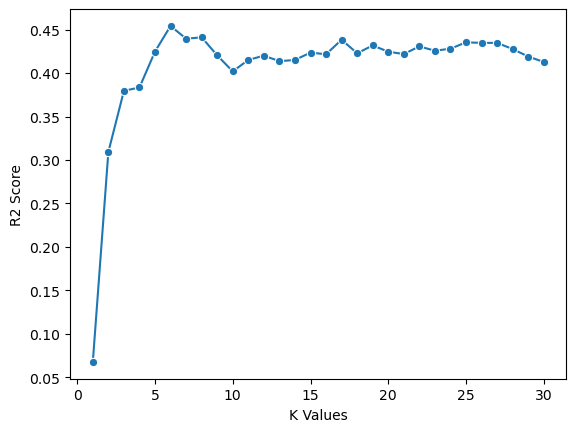

In [14]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("R2 Score")

## KNN for Text Classification using KNN model on film dataset evaluation

In [15]:
# Import libraries
!pip install -q datasets

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\huggingface_hub-0.24.6-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [16]:

import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [22]:
# Load IMDB dataset
imdb = load_dataset("imdb")

In [19]:
imdb_train, imdb_test = imdb['train'], imdb['test']

In [20]:
len(imdb_train['text']), len(imdb_test['text'])

(25000, 25000)

In [23]:
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()

In [24]:
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])

In [25]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [27]:
# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.60444

In [28]:
f1_score(y_test, y_pred)

0.6141480354286161

In [29]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59     12500
           1       0.60      0.63      0.61     12500

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000

